參考資料：http://www.astroml.org/index.html

# Supervised Learning Model
監督式學習 - 根據已經有的經驗知識來對未知的目標進行分類、預測。<br>
流程簡述：<br>
* 準備訓練數據(文本、影像、聲音等)
* 特徵萃取(找出對目標答案有高度相關的特徵)，形成特徵向量(Feature Vector) - 通常以X表示
* 標記答案(Labels)：每一組特徵向量所對應的標記或目標
* 選取模型(ML Algorithm)：根據問題需求，選擇模型演算法進行訓練
* 測試模型：經由上一個步驟獲得對應的模型可進行預測，再利用測試數據進行模型效果分析
* 模型優化

## 分類問題(Classification)
* Binary Classification
* Multiclass Classification
* Multi-label Classification

### Linear Classifiers
假設特徵向量與分類結果存在線性關係的模型<br>
Def:<br>
特徵向量：X = [x1, x2, x3, ..., xn]<br>
特徵權重：W = [w1, w2, w3, ..., wn]<br>
截距(偏誤)：Intercept(bias)，避免過座標系統原點的假設<br>
線性方程式可表示為：<br>
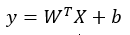<br>

這裡的  ，取值範圍分布在整個實數域中

二分類問題要把一個函數的值映射到(0, 1)，可以使用羅吉斯回歸(Logistic Regression)，亦即判斷某個問題是true還是false<br>
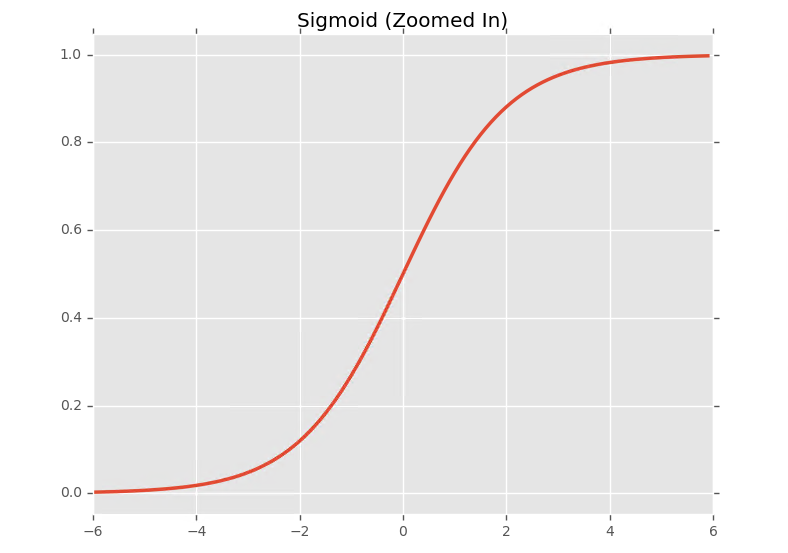

Logistic Regression：
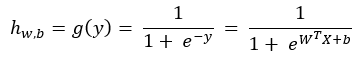

### Breast Cancer Wisconsin
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
<br>
<font color="red"><b>請同學觀察資料，然後進行說明。</b></font>

In [1]:
# 匯入相關套件
import pandas as pd
import numpy as np

In [2]:
# 特徵欄位命名
col_names = ["Sample_Code_Number", "Clump_Thickness", "Uniformity_of_Cell_Size", 
             "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", 
             "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]
# 讀取資料檔案
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=col_names)
df.head()

,Sample_Code_Number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.isnull().any()

Sample_Code_Number             False
Clump_Thickness                False
Uniformity_of_Cell_Size        False
Uniformity_of_Cell_Shape       False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                    False
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [4]:
# 處理缺失值 "?"，替換成np.nan
df = df.replace(to_replace="?", value=np.nan)

In [5]:
df.isnull().any()

Sample_Code_Number             False
Clump_Thickness                False
Uniformity_of_Cell_Size        False
Uniformity_of_Cell_Shape       False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                     True
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [6]:
# 丟棄有缺失值的數據
df = df.dropna(how="any")

In [7]:
df.isnull().any()

Sample_Code_Number             False
Clump_Thickness                False
Uniformity_of_Cell_Size        False
Uniformity_of_Cell_Shape       False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                    False
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [8]:
df.shape

(683, 11)

In [9]:
# 將數據分割成訓練與測試數據
from sklearn.model_selection import train_test_split
# training data: 75%，testing data: 25%
X_train, X_test, y_train, y_test = train_test_split(df[col_names[1:10]], df[col_names[10]], test_size=0.25, random_state=42)
# 檢視訓練數據與測試數據之類別分布
print(y_train.value_counts())
print(y_test.value_counts())

2    341
4    171
Name: Class, dtype: int64
2    103
4     68
Name: Class, dtype: int64


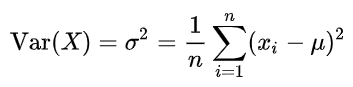

In [10]:
# 用線性分類模型進行良性/惡性腫瘤預測
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# 進行數據標準化，保證每個特徵數據的變異數(Variance)為 1，平均值(Mean)為 0，使預測結果不會被某些維度過大的特徵值所主導
# fit_transform是fit和transform的組合，既包括了訓練又包含了轉換
X_train = StandardScaler().fit_transform(X_train)
# 在fit的基礎上，進行標準化，降維，正規化等操作
X_test = StandardScaler().fit_transform(X_test)

In [11]:
# 初始化分類器
lr = LogisticRegression()
sgdc = SGDClassifier()
# 訓練模型參數
lr.fit(X_train, y_train)
sgdc.fit(X_train, y_train)
# 利用模型預測
lr_y_pred = lr.predict(X_test)
sgdc_y_pred = sgdc.predict(X_test)

### 混淆矩陣 - Precision and Recall
https://en.wikipedia.org/wiki/Precision_and_recall

#### 準確性：預測正確的比率
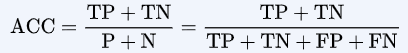

#### 精確率(Positive Predictive Value)：即陽性的樣本中有幾個是預測正確的
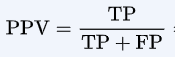

#### 召回率(True Positive Rate)：即事實為真的樣本中有幾個是預測正確的
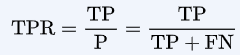

#### F1 Score：即精確率與召回率的調和平均數
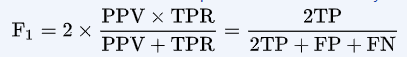

In [12]:
# 性能評測
from sklearn.metrics import classification_report

print("Acc of Logistic Regression Classifier:", lr.score(X_test, y_test))
print(classification_report(y_test, lr_y_pred, target_names=["Benign", "Malignant"]))

Acc of Logistic Regression Classifier: 0.9473684210526315
              precision    recall  f1-score   support

      Benign       0.93      0.99      0.96       103
   Malignant       0.98      0.88      0.93        68

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [13]:
print("Acc of SGD Classifier:", sgdc.score(X_test, y_test))
print(classification_report(y_test, sgdc_y_pred, target_names=["Benign", "Malignant"]))

Acc of SGD Classifier: 0.9649122807017544
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97       103
   Malignant       0.98      0.93      0.95        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



<font color="red"><b>請同學嘗試解讀報告結果。</b></font>

### SVM
https://medium.com/jameslearningnote/資料分析-機器學習-第3-4講-支援向量機-support-vector-machine-介紹-9c6c6925856b

In [14]:
# 支援向量機(Support Vector Machine, SVM)
# 根據訓練樣本的分布，搜索所有可能的線性分類器中最佳的那個(不是絕對)
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
# 分割數據集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)
print(y_train.shape)
print(y_test.shape)

(1347,)
(450,)


In [16]:
# SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [17]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
lsvc_y_pred = lsvc.predict(X_test)

c:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
print("Acc of SVC is:", lsvc.score(X_test, y_test))
print(classification_report(y_test, lsvc_y_pred, target_names=digits.target_names.astype(str)))

Acc of SVC is: 0.96
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.96        37
           2       0.95      1.00      0.97        38
           3       1.00      0.91      0.95        46
           4       0.96      0.98      0.97        55
           5       0.95      0.95      0.95        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.87      0.89      0.88        38
           9       0.96      0.94      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



### Naive Bayes
https://medium.com/展開數據人生/python機器學習-110-單純貝氏分類器-50cdd9ce16f7

In [19]:
# 樸素貝葉斯(Naive Bayes)
# 單獨考量每一個維度特徵被分類條件機率，進而綜合這些機率對其所在的特徵向量進行分類預測
# 導入新聞數據
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset="all")
print(len(news.data))
print(news.data[0])

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [20]:
# 20類新聞文本數據分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.25, random_state=42)

In [21]:
# 導入文本特徵向量轉化模組
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)

In [23]:
# 效能評估
from sklearn.metrics import classification_report
print("Acc of mnb is:", mnb.score(X_test, y_test))
print(classification_report(y_test, mnb_y_pred, target_names=news.target_names))

Acc of mnb is: 0.8499575551782682
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.90      0.88       198
           comp.graphics       0.64      0.88      0.74       245
 comp.os.ms-windows.misc       0.95      0.21      0.35       242
comp.sys.ibm.pc.hardware       0.61      0.86      0.72       238
   comp.sys.mac.hardware       0.89      0.88      0.89       250
          comp.windows.x       0.84      0.83      0.84       260
            misc.forsale       0.93      0.66      0.77       241
               rec.autos       0.89      0.93      0.91       244
         rec.motorcycles       0.96      0.93      0.94       219
      rec.sport.baseball       0.97      0.95      0.96       261
        rec.sport.hockey       0.96      0.96      0.96       245
               sci.crypt       0.85      0.97      0.91       251
         sci.electronics       0.90      0.83      0.86       249
                 sci.med       0.94      

### K-Nearest Neighbors
https://zh.wikipedia.org/wiki/K-近邻算法https://

In [24]:
# KNN - 尋找待分類樣本在特徵空間中距離最近的K個標記樣本作為參考，來進行分類
# 使用Iris數據集
from sklearn.datasets import load_iris
iris = load_iris()

iris.data.shape

(150, 4)

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [28]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_y_pred = knc.predict(X_test)

In [29]:
# 效能評估
from sklearn.metrics import classification_report
print("Acc of knc is:", knc.score(X_test, y_test))
print(classification_report(y_test, knc_y_pred, target_names=iris.target_names))

Acc of knc is: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Decision Tree - 決策樹
https://medium.com/jameslearningnote/資料分析-機器學習-第3-5講-決策樹-decision-tree-以及隨機森林-random-forest-介紹-7079b0ddfbda

In [30]:
# Decision Tree - 非線性關係的情況
# 舉例：信用卡申請的審核涉及申請人的多項特徵
# 決策樹節點(node)代表特徵數據、節點的分支對應特徵值的分類、樹葉節點則是模型的決策結果
import pandas as pd
titanic= pd.read_csv("https://hbiostat.org/data/repo/titanic.txt")
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [32]:
X = titanic[["pclass", "age", "sex"]]
y = titanic["survived"]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1313 non-null   object 
 1   age     633 non-null    float64
 2   sex     1313 non-null   object 
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


In [33]:
# age 數據只有633個，需要補完
X.age.fillna(X.age.mean(), inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1313 non-null   object 
 1   age     1313 non-null   float64
 2   sex     1313 non-null   object 
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


C:\Users\superuser\AppData\Local\Temp\ipykernel_16332\964993664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(X.age.mean(), inplace=True)


In [34]:
# pclass 與 sex兩個數據是類別型資料，需要轉換成數值型資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
# 轉換特徵後，類別型資料單獨分離出來，數值型資料不變
X_train = vec.fit_transform(X_train.to_dict(orient="record"))
vec.feature_names_

C:\Users\superuser\AppData\Local\Temp\ipykernel_16332\1162171493.py:8: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_train = vec.fit_transform(X_train.to_dict(orient="record"))


['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [35]:
X_test = vec.fit_transform(X_test.to_dict(orient="record"))
vec.feature_names_

C:\Users\superuser\AppData\Local\Temp\ipykernel_16332\3277110587.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_test = vec.fit_transform(X_test.to_dict(orient="record"))


['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print("Acc of dtc is:", dtc.score(X_test, y_test))
print(classification_report(y_test, dtc_y_pred, target_names=["dead", "survived"]))

Acc of dtc is: 0.8024316109422492
              precision    recall  f1-score   support

        dead       0.79      0.93      0.85       206
    survived       0.83      0.59      0.69       123

    accuracy                           0.80       329
   macro avg       0.81      0.76      0.77       329
weighted avg       0.81      0.80      0.79       329



### Ensemble Model - 集成模型
https://en.wikipedia.org/wiki/Ensemble_learning

In [38]:
# 綜合考量多個分類器的預測結果，進而做出決策
import pandas as pd
titanic= pd.read_csv("https://hbiostat.org/data/repo/titanic.txt")
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [39]:
X = titanic[["pclass", "age", "sex"]]
y = titanic["survived"]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1313 non-null   object 
 1   age     633 non-null    float64
 2   sex     1313 non-null   object 
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


In [40]:
# age 數據只有633個，需要補完
X.age.fillna(X.age.mean(), inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1313 non-null   object 
 1   age     1313 non-null   float64
 2   sex     1313 non-null   object 
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


C:\Users\superuser\AppData\Local\Temp\ipykernel_16332\964993664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(X.age.mean(), inplace=True)


In [41]:
# pclass 與 sex兩個數據是類別型資料，需要轉換成數值型資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
# 轉換特徵後，類別型資料單獨分離出來，數值型資料不變
X_train = vec.fit_transform(X_train.to_dict(orient="record"))
vec.feature_names_

C:\Users\superuser\AppData\Local\Temp\ipykernel_16332\1162171493.py:8: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_train = vec.fit_transform(X_train.to_dict(orient="record"))


['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [42]:
X_test = vec.fit_transform(X_test.to_dict(orient="record"))
vec.feature_names_

C:\Users\superuser\AppData\Local\Temp\ipykernel_16332\3277110587.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_test = vec.fit_transform(X_test.to_dict(orient="record"))


['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print("Acc of dtc is:", dtc.score(X_test, y_test))
print(classification_report(y_test, dtc_y_pred, target_names=["dead", "survived"]))

print("Acc of rfc is:", rfc.score(X_test, y_test))
print(classification_report(y_test, rfc_y_pred, target_names=["dead", "survived"]))

print("Acc of gbc is:", gbc.score(X_test, y_test))
print(classification_report(y_test, gbc_y_pred, target_names=["dead", "survived"]))

Acc of dtc is: 0.8024316109422492
              precision    recall  f1-score   support

        dead       0.79      0.93      0.85       206
    survived       0.83      0.59      0.69       123

    accuracy                           0.80       329
   macro avg       0.81      0.76      0.77       329
weighted avg       0.81      0.80      0.79       329

Acc of rfc is: 0.8085106382978723
              precision    recall  f1-score   support

        dead       0.80      0.92      0.86       206
    survived       0.82      0.63      0.71       123

    accuracy                           0.81       329
   macro avg       0.81      0.77      0.78       329
weighted avg       0.81      0.81      0.80       329

Acc of gbc is: 0.8237082066869301
              precision    recall  f1-score   support

        dead       0.81      0.94      0.87       206
    survived       0.87      0.63      0.73       123

    accuracy                           0.82       329
   macro avg       0.84   

<font color="red"><b>請同學嘗試彙整上述幾個分類方法。</b></font>